#### 1. train.csv : 학습 데이터

| column name| column name |
|:-------|:-------|
|id|샘플아이디|
|Store|쇼핑몰 지점|
|Date|주 단위(Weekly) 날짜|
|Temperature|해당 쇼핑몰 주변 기온|
|Fuel_Price|해당 쇼핑몰 주변 연료 가격|
|Promotion 1~5|해당 쇼핑몰의 비식별화된 프로모션 정보|
|Unemployment|해당 쇼핑몰 지역의 실업률|
|IsHoliday|해당 기간의 공휴일 포함 여부|
|Weekly_Sales|주간 매출액 (목표 예측값)|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import rc
rc('font', family='AppleGothic')
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("/Users/unixking/Desktop/데이콘/쇼핑몰지점별매출액예측/dataset/prepare/train.csv", encoding="utf-8")


In [2]:
#df["Date"] = pd.to_datetime(df['Date'], infer_datetime_format=True)

#df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


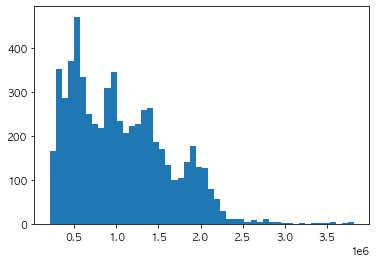

In [4]:
plt.hist(df.Weekly_Sales, bins=50)
plt.show()

In [5]:
df.columns

Index(['id', 'Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales'],
      dtype='object')

### 결국 쇼핑몰 지점은 139명씩 같은 수의 사람들이 옴

In [6]:
df.Store.value_counts(sort=False)

4     139
8     139
12    139
16    139
20    139
24    139
28    139
32    139
36    139
40    139
44    139
1     139
5     139
9     139
13    139
17    139
21    139
25    139
29    139
33    139
37    139
41    139
45    139
2     139
6     139
10    139
14    139
18    139
22    139
26    139
30    139
34    139
38    139
42    139
3     139
7     139
11    139
15    139
19    139
23    139
27    139
31    139
35    139
39    139
43    139
Name: Store, dtype: int64

### 결측치 확인

In [7]:
df.isna().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

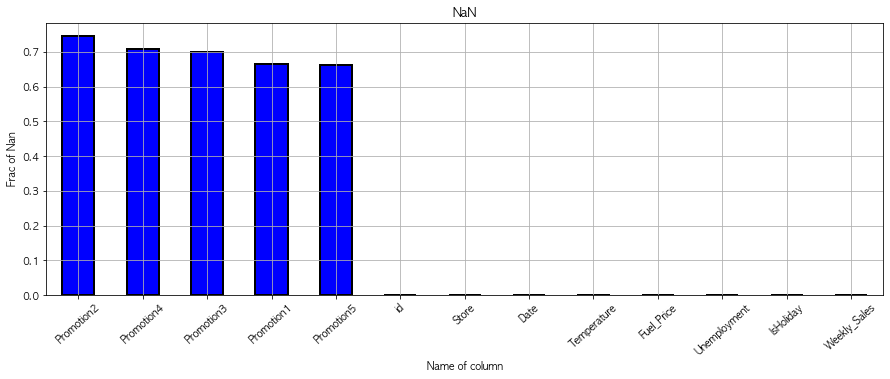

In [8]:
df.isna().mean().sort_values(ascending=False).plot( kind='bar', figsize=(15,5),  grid=True, color='blue', edgecolor='black', linewidth=2, rot=42)
plt.title('NaN')
plt.xlabel('Name of column')
plt.ylabel('Frac of Nan')
plt.show()

In [9]:
nan = ["Promotion1", "Promotion2", "Promotion3", "Promotion4", "Promotion5"] #어차피 nan값이 promotion밖에 없으므로 이 컬럼만 리스트로 할당

for i in range(1, 46):
    print("{}의 store의 nan 갯수".format(i))
    print(df[df.Store == i][nan].isna().sum(),"\n\n")


1의 store의 nan 갯수
Promotion1    92
Promotion2    98
Promotion3    93
Promotion4    92
Promotion5    92
dtype: int64 


2의 store의 nan 갯수
Promotion1    92
Promotion2    98
Promotion3    93
Promotion4    92
Promotion5    92
dtype: int64 


3의 store의 nan 갯수
Promotion1     92
Promotion2    101
Promotion3     99
Promotion4     94
Promotion5     92
dtype: int64 


4의 store의 nan 갯수
Promotion1    92
Promotion2    97
Promotion3    94
Promotion4    92
Promotion5    92
dtype: int64 


5의 store의 nan 갯수
Promotion1     92
Promotion2    103
Promotion3     98
Promotion4     93
Promotion5     92
dtype: int64 


6의 store의 nan 갯수
Promotion1    92
Promotion2    96
Promotion3    93
Promotion4    92
Promotion5    92
dtype: int64 


7의 store의 nan 갯수
Promotion1     92
Promotion2    103
Promotion3     94
Promotion4     92
Promotion5     92
dtype: int64 


8의 store의 nan 갯수
Promotion1    92
Promotion2    98
Promotion3    94
Promotion4    93
Promotion5    92
dtype: int64 


9의 store의 nan 갯수
Promotion1     92
Promot

### 지점별로 promotion 결측치가 2/3정도 있다는 것을 파악할 수 있다.

## 지점별 매출액 평균

#### 따라서 지점별로 매출액이 큰 편차를 가지고 있다.

In [10]:
pd.options.display.float_format = '{:.2f}'.format
dm = df.groupby('Store')['Weekly_Sales'].agg(**{'mean_Weekly_Sales':'mean'}).sort_values("mean_Weekly_Sales", ascending=False)
dm

,mean_Weekly_Sales
Store,
20,2107607.30
4,2093195.90
14,2031497.13
13,2003046.80
2,1926625.37
10,1904069.56
27,1778997.10
6,1567699.61
1,1555087.92


In [11]:
holi = df['IsHoliday'].value_counts()

trace=go.Pie(labels=holi.index,
            values=holi.values,
            hole=0.3)

layout=go.Layout(title='해당 기간의 공휴일 포함 여부 비율')

fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

## 지점별 매출액 추이 비교

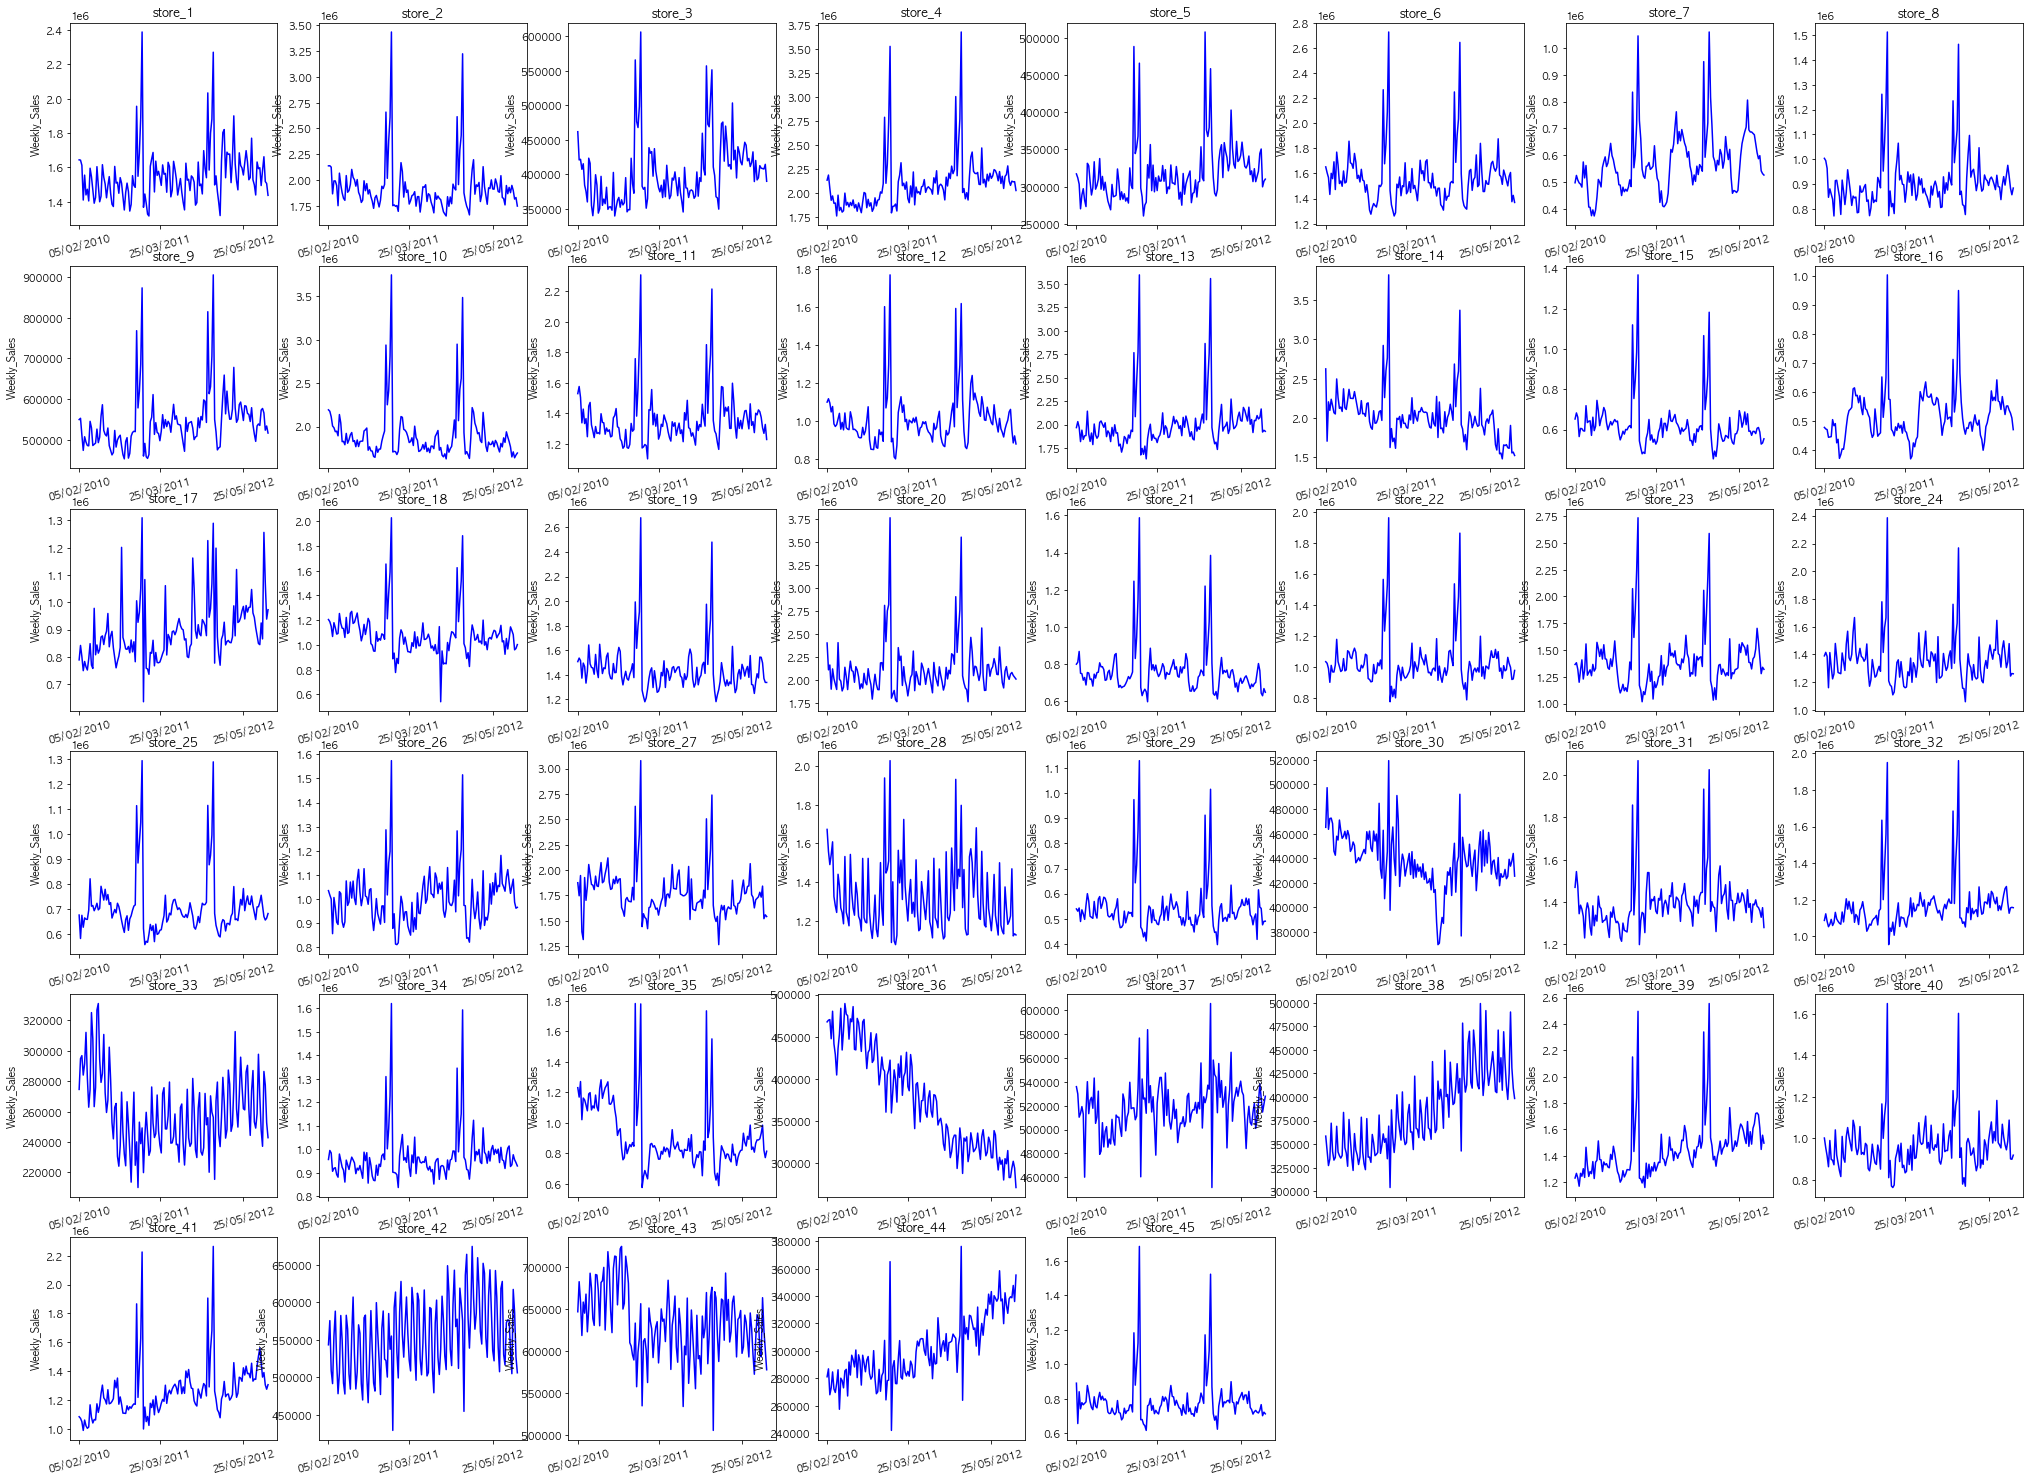

In [12]:
from matplotlib import dates

fig = plt.figure(figsize=(35,35)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정

for i in range(1,46):
    train2 = df[df.Store == i]

    train2  = train2[["Date", "Weekly_Sales"]]
    
    ax = fig.add_subplot(8,8,i) ## 그림 뼈대(프레임) 생성


    plt.title("store_{}".format(i)) 
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=15)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
    ax.plot(train2["Date"], train2["Weekly_Sales"],marker='',label='train', color="blue")

plt.show()
# %%


### 여기서 28, 30, 33, 36, 37, 38, 42, 43, 44 지점은 추세가 일치하지 않음!
### 그러므로 위의 포함되어 있지 않은 지점은 같은 모델 돌려도 댄다고 판단!

## 1개 지점별 상관관계 분석

<Figure size 2520x2520 with 0 Axes>

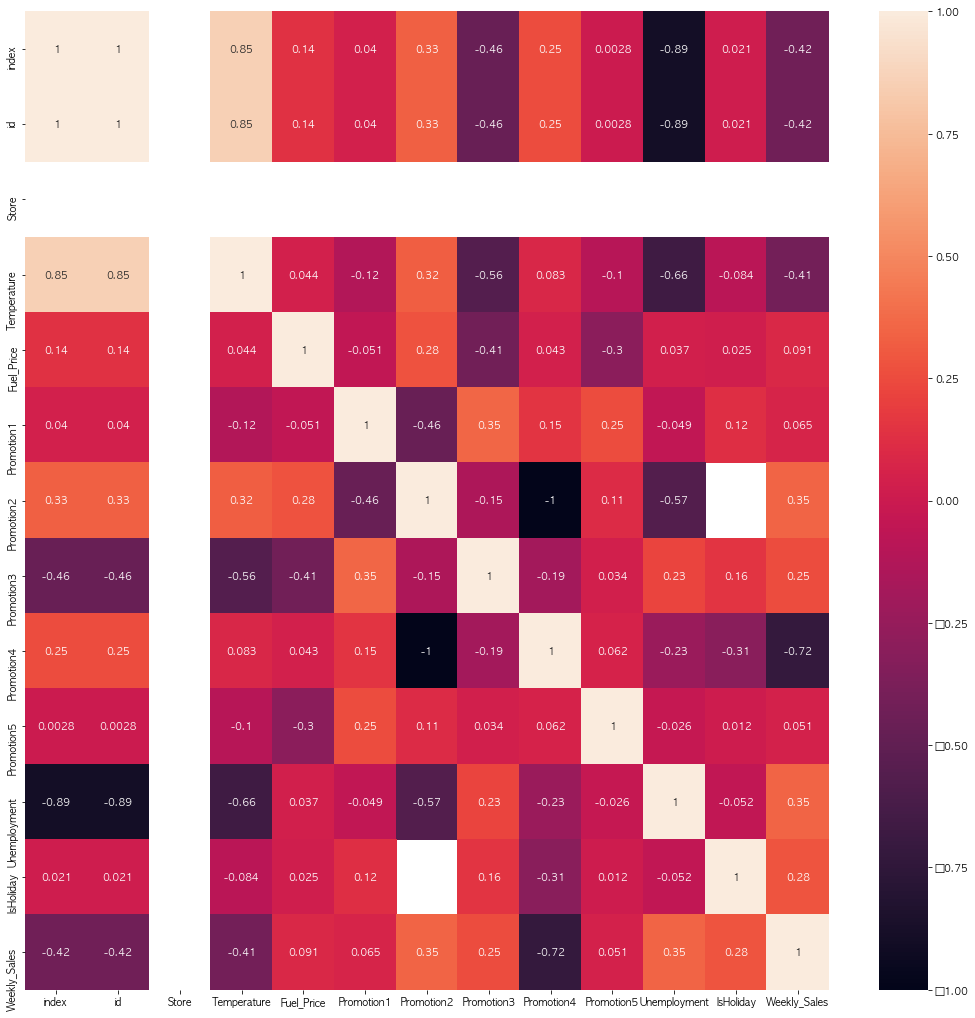

In [13]:
from matplotlib import dates

fig = plt.figure(figsize=(35,35)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정

for i in range(43,44):
    train2 = df[df.Store == i]
    train2 = train2.reset_index()
    train2 = train2.iloc[100:]
    plt.figure(figsize=(18,18))
    sns.heatmap(data=train2.corr(), annot=True);
    
plt.show()

## 45개 지점별 상관관계 분석

In [14]:
corr = []
exc = [36, 38 , 42, 43, 44]
for num in exc:
#for num in range(1,46):
    co = df[df.Store==num]
    co = co.reset_index()
    co = co.iloc[100:]
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['index', 'id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,6))
#corr_df.index = list(range(1,46))

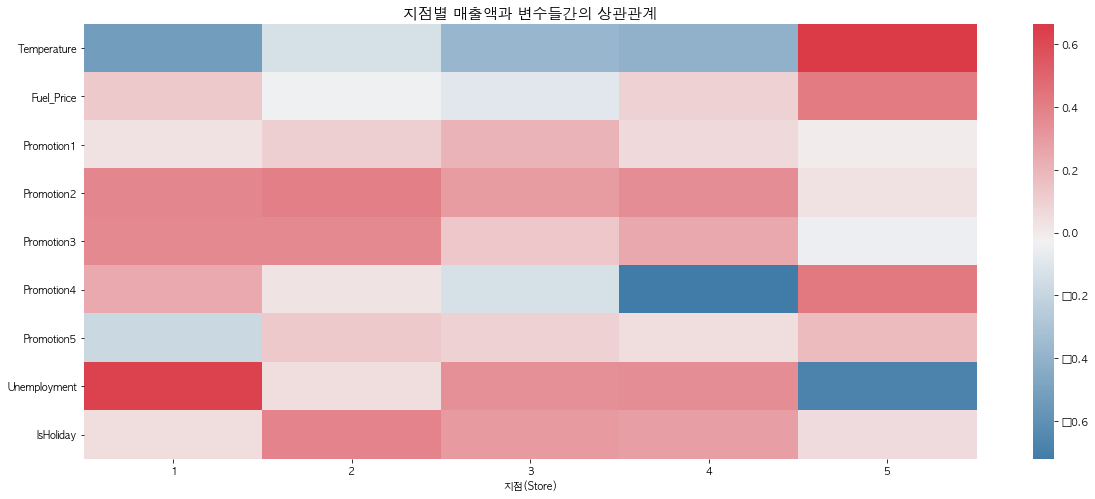

In [15]:
f, ax = plt.subplots(figsize=(20,8))
plt.title("지점별 매출액과 변수들간의 상관관계", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('지점(Store)')
plt.show()


In [16]:
df[df.Store==1].loc[70:100]


,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
70,71,1,10/06/2011,83.13,3.65,NaN,NaN,NaN,NaN,NaN,7.68,False,1588948.32
71,72,1,17/06/2011,86.41,3.64,NaN,NaN,NaN,NaN,NaN,7.68,False,1532114.86
72,73,1,24/06/2011,83.58,3.59,NaN,NaN,NaN,NaN,NaN,7.68,False,1438830.15
73,74,1,01/07/2011,85.55,3.52,NaN,NaN,NaN,NaN,NaN,7.96,False,1488538.09
74,75,1,08/07/2011,85.83,3.48,NaN,NaN,NaN,NaN,NaN,7.96,False,1534849.64
75,76,1,15/07/2011,88.54,3.58,NaN,NaN,NaN,NaN,NaN,7.96,False,1455119.97
76,77,1,22/07/2011,85.77,3.65,NaN,NaN,NaN,NaN,NaN,7.96,False,1396926.82
77,78,1,29/07/2011,86.83,3.68,NaN,NaN,NaN,NaN,NaN,7.96,False,1352219.79
78,79,1,05/08/2011,91.65,3.68,NaN,NaN,NaN,NaN,NaN,7.96,False,1624383.75
79,80,1,12/08/2011,90.76,3.64,NaN,NaN,NaN,NaN,NaN,7.96,False,1525147.09


In [17]:
df[df.Store==2].loc[220:]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
220,221,2,26/08/2011,90.45,3.52,NaN,NaN,NaN,NaN,NaN,7.85,False,1821139.91
221,222,2,02/09/2011,89.64,3.53,NaN,NaN,NaN,NaN,NaN,7.85,False,1809119.70
222,223,2,09/09/2011,77.97,3.55,NaN,NaN,NaN,NaN,NaN,7.85,True,1748000.65
223,224,2,16/09/2011,78.85,3.53,NaN,NaN,NaN,NaN,NaN,7.85,False,1691439.52
224,225,2,23/09/2011,75.58,3.47,NaN,NaN,NaN,NaN,NaN,7.85,False,1669299.78
225,226,2,30/09/2011,78.14,3.35,NaN,NaN,NaN,NaN,NaN,7.85,False,1650394.44
226,227,2,07/10/2011,69.92,3.29,NaN,NaN,NaN,NaN,NaN,7.44,False,1837553.43
227,228,2,14/10/2011,71.67,3.27,NaN,NaN,NaN,NaN,NaN,7.44,False,1743882.19
228,229,2,21/10/2011,64.53,3.35,NaN,NaN,NaN,NaN,NaN,7.44,False,1834680.25
229,230,2,28/10/2011,65.87,3.37,NaN,NaN,NaN,NaN,NaN,7.44,False,1769296.25


## <span style="color:red">결국 2011년 11월 11일부터 promotion이라는 개념이 생겼다는것을 알 수 있음</span>
## 2011년 11월 11일 이전꺼는 다 0으로 대치

In [18]:
for i in range (1, 46):
    df.loc[:91+(139*(i-1)), nan] = 0    #각 지점에 대해 2011년 11월 11일전의 프로모션은 0으로 바꾸었다.
    

#### 지점별로 2011년 11월 11일 이전꺼는 다 0으로 대치한 후에 결측치는 아래와 같다.

In [19]:
df.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      6
Promotion3      2
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

### <span style="color:skyblue"> 나머지 결측치는 선형보간법을 활용하여 대치한다. </span>

In [20]:
df = df.interpolate(method='values')

In [21]:
df.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

In [22]:
df

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.57,0.00,0.00,0.00,0.00,0.00,8.11,False,1643690.90
1,2,1,12/02/2010,38.51,2.55,0.00,0.00,0.00,0.00,0.00,8.11,True,1641957.44
2,3,1,19/02/2010,39.93,2.51,0.00,0.00,0.00,0.00,0.00,8.11,False,1611968.17
3,4,1,26/02/2010,46.63,2.56,0.00,0.00,0.00,0.00,0.00,8.11,False,1409727.59
4,5,1,05/03/2010,46.50,2.62,0.00,0.00,0.00,0.00,0.00,8.11,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.87,23641.30,6.00,92.93,6988.31,3992.13,8.68,False,734297.87
6251,6252,45,07/09/2012,75.70,3.91,11024.45,12.80,52.63,1854.77,2055.70,8.68,True,766512.66
6252,6253,45,14/09/2012,67.87,3.95,11407.95,52.54,4.30,3421.72,5268.92,8.68,False,702238.27
6253,6254,45,21/09/2012,65.32,4.04,8452.20,92.28,63.24,2376.38,8670.40,8.68,False,723086.20


In [23]:
def date_encoder(date):
    day, month, year = map(int, date.split('/'))
    return day, month, year

# 이 함수를 Date 칼럼에 적용하여 Day, Month, Year 칼럼을 생성합니다.

df['month'] = df['Date'].apply(lambda x: date_encoder(x)[1])

In [24]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df['year'] = df.Date.dt.year.apply(lambda x: int(x))
df['week'] = df.Date.dt.isocalendar().week.apply(lambda x: int(x))
df['day'] = df.Date.dt.day.apply(lambda x: int(x))
df['month'] = df.Date.dt.month.apply(lambda x: int(x))

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(df['IsHoliday'])   
df['IsHoliday'] = le.transform(df['IsHoliday'])   
df["IsHoliday"]

0       0
1       1
2       0
3       0
4       0
       ..
6250    0
6251    1
6252    0
6253    0
6254    0
Name: IsHoliday, Length: 6255, dtype: int64

In [26]:
df

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,month,year,week,day
0,1,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,8.11,0,1643690.90,2,2010,5,5
1,2,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,8.11,1,1641957.44,2,2010,6,12
2,3,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,8.11,0,1611968.17,2,2010,7,19
3,4,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,8.11,0,1409727.59,2,2010,8,26
4,5,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,8.11,0,1554806.68,3,2010,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.87,23641.30,6.00,92.93,6988.31,3992.13,8.68,0,734297.87,8,2012,35,31
6251,6252,45,2012-09-07,75.70,3.91,11024.45,12.80,52.63,1854.77,2055.70,8.68,1,766512.66,9,2012,36,7
6252,6253,45,2012-09-14,67.87,3.95,11407.95,52.54,4.30,3421.72,5268.92,8.68,0,702238.27,9,2012,37,14
6253,6254,45,2012-09-21,65.32,4.04,8452.20,92.28,63.24,2376.38,8670.40,8.68,0,723086.20,9,2012,38,21


In [27]:
#df.to_csv("/Users/unixking/Desktop/데이콘/쇼핑몰지점별매출액예측/dataset/replace2.csv", encoding="utf-8")

## 하지만 결측치를 다 처리하였을 떄 Promotion 1~5까지의 상관관계는 
## 큰 의미를 갖지 않고 있다는 것을 알 수 있다.

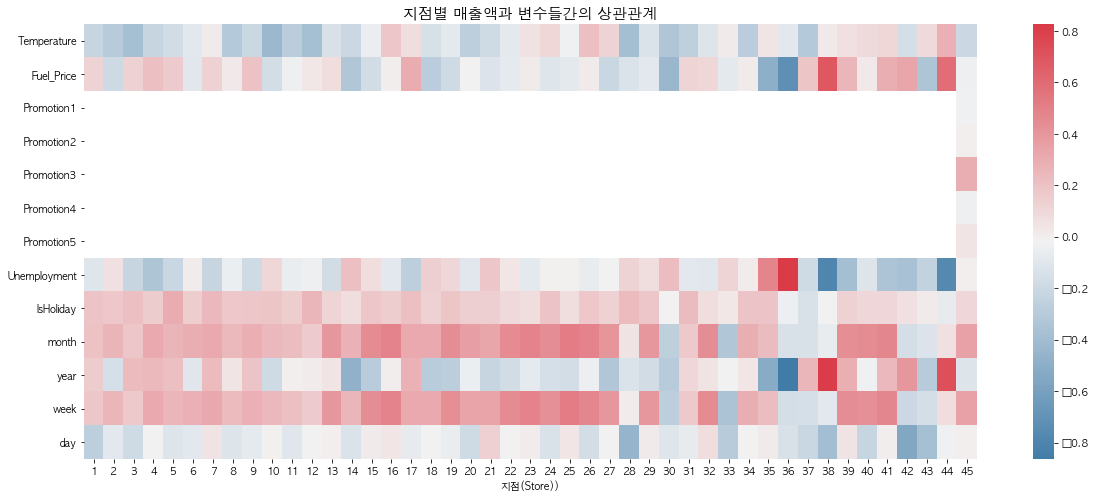

In [28]:
corr = []
for num in range(1,46):
    co = df[df.Store==num]
    co = co.reset_index()
    num_corr = co.corr()['Weekly_Sales']
    num_corr = num_corr.drop(['index', 'id','Store','Weekly_Sales'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,46))

f, ax = plt.subplots(figsize=(20,8))
plt.title("지점별 매출액과 변수들간의 상관관계", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('지점(Store))')
plt.show()


# Test 데이터 결측치 처리

In [29]:
test = pd.read_csv("/Users/unixking/Desktop/데이콘/쇼핑몰지점별매출액예측/dataset/prepare/test.csv", encoding="utf-8")

In [30]:
test.isna().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

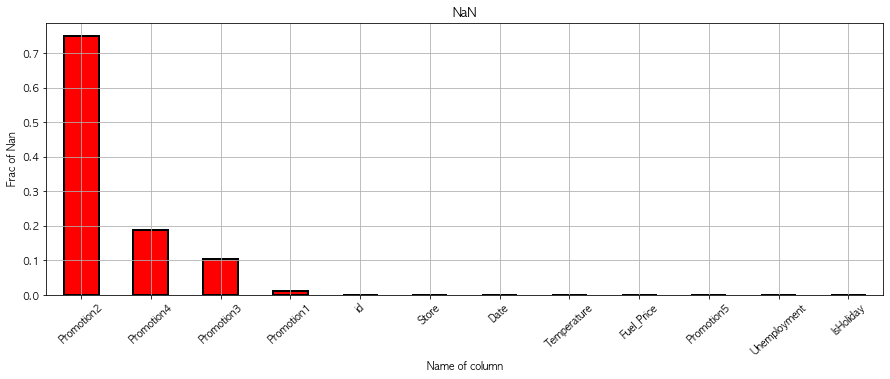

In [31]:
test.isna().mean().sort_values(ascending=False).plot( kind='bar', figsize=(15,5),  grid=True, color='red', edgecolor='black', linewidth=2, rot=42)
plt.title('NaN')
plt.xlabel('Name of column')
plt.ylabel('Frac of Nan')
plt.show()

## test데이터는 2011년 11월 11일 이후 Date를 가지고 있으므로 선형보간법을 활용하였다.

In [32]:
test = test.interpolate(method='values')

In [33]:
test.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      3
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

## 선형보간법을 활용한 후에 나머지 결측치는 뒤에꺼와 관계가 있다고 생각하여 선형보간법 대신 
## bfill 메소드를 활용해 결측치를 대치하였다

In [34]:
test = test.fillna(method='bfill')

In [35]:
test.isna().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

In [36]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.62,8077.89,31.75,18.22,3617.43,3626.14,6.57,False
1,2,1,12/10/2012,62.99,3.60,2086.18,31.75,8.11,602.36,5926.45,6.57,False
2,3,1,19/10/2012,67.97,3.59,950.33,31.75,4.93,80.25,2312.85,6.57,False
3,4,1,26/10/2012,69.16,3.51,2585.85,31.75,6.00,1057.16,1305.01,6.57,False
4,5,2,05/10/2012,70.27,3.62,6037.76,56.26,10.04,3027.37,3853.40,6.17,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.75,38.65,2.61,0.98,2066.53,457.74,5.22,False
176,177,45,05/10/2012,64.89,3.98,5046.74,16.48,18.82,2253.43,2340.01,8.67,False
177,178,45,12/10/2012,54.47,4.00,1956.28,30.34,7.89,599.32,3990.54,8.67,False
178,179,45,19/10/2012,56.47,3.97,2004.02,44.21,3.18,437.73,1537.49,8.67,False


In [37]:
test.Date = pd.to_datetime(test.Date, format="%d/%m/%Y")

test['Day'] = test.Date.dt.day.apply(lambda x: int(x))
test['Month'] = test.Date.dt.month.apply(lambda x: int(x))
test['Week'] = test.Date.dt.isocalendar().week.apply(lambda x: int(x))
test['year'] = test.Date.dt.year.apply(lambda x: int(x))


In [38]:
le = LabelEncoder()
le = le.fit(test['IsHoliday'])   
test['IsHoliday'] = le.transform(test['IsHoliday'])   
test['IsHoliday']

0      0
1      0
2      0
3      0
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Name: IsHoliday, Length: 180, dtype: int64

In [39]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Day,Month,Week,year
0,1,1,2012-10-05,68.55,3.62,8077.89,31.75,18.22,3617.43,3626.14,6.57,0,5,10,40,2012
1,2,1,2012-10-12,62.99,3.60,2086.18,31.75,8.11,602.36,5926.45,6.57,0,12,10,41,2012
2,3,1,2012-10-19,67.97,3.59,950.33,31.75,4.93,80.25,2312.85,6.57,0,19,10,42,2012
3,4,1,2012-10-26,69.16,3.51,2585.85,31.75,6.00,1057.16,1305.01,6.57,0,26,10,43,2012
4,5,2,2012-10-05,70.27,3.62,6037.76,56.26,10.04,3027.37,3853.40,6.17,0,5,10,40,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.75,38.65,2.61,0.98,2066.53,457.74,5.22,0,26,10,43,2012
176,177,45,2012-10-05,64.89,3.98,5046.74,16.48,18.82,2253.43,2340.01,8.67,0,5,10,40,2012
177,178,45,2012-10-12,54.47,4.00,1956.28,30.34,7.89,599.32,3990.54,8.67,0,12,10,41,2012
178,179,45,2012-10-19,56.47,3.97,2004.02,44.21,3.18,437.73,1537.49,8.67,0,19,10,42,2012


In [40]:
test.to_csv("/Users/unixking/Desktop/데이콘/쇼핑몰지점별매출액예측/dataset/replacetest2.csv", encoding="utf-8")